# Generating Plots

Having now trained a large combination of models we want to visualize the results to try and identify patterns in model performance

In [1]:
import os
from pathlib import Path
import sys
colab = False
import warnings
warnings.filterwarnings('ignore')

Change the directory to the repository and pull latest changes (if any). Display the directory content and set basic datapaths.

In [2]:
%cd ..
! ls

/home/kyle/programming/opinion_lab/github/opinion-lab-group-1.3
data	   records	     tmp
models	   requirements.txt  train_binary_attribute_sampling.sh
notebooks  retrain_bert.sh   train_missing.sh
README.md  src		     trash


## Constants

In [3]:
ROOT = Path(os.getcwd())
DATA = ROOT/'data'
SRC =  ROOT/'src'
RAW_DATA = DATA/'raw'
RECORDS = ROOT/'records'
RESTAURANT_ATTRIBUTES = RECORDS/'restaurants'/'attribute_froze_weights_2'
RESTAURANT_ENTITIES = RECORDS/'restaurants'/'entity_frozen_weights_2'
ATTR_FILES = os.listdir(RESTAURANT_ATTRIBUTES)
ENT_FILES = os.listdir(RESTAURANT_ENTITIES)
print(ROOT)

/home/kyle/programming/opinion_lab/github/opinion-lab-group-1.3


In [4]:
sys.path.append(str(SRC))

## Imports

In [5]:
import itertools
import matplotlib.pyplot as plt
import pandas as pd
import plots

In [6]:
if '.gitignore' in ATTR_FILES:
    ATTR_FILES.remove('.gitignore')
#if '.gitignore' in ENT_FILES:
#    ENT_FILES.remove('.gitignore')

## Importing Data 

In [7]:
attr_logs = plots.load_logs_as_df(RESTAURANT_ATTRIBUTES, ATTR_FILES)
ent_logs = plots.load_logs_as_df(RESTAURANT_ENTITIES, ENT_FILES)


In [8]:
logs = pd.concat([attr_logs, ent_logs])
#logs = attr_logs

In [9]:
logs.head()

,filename,abae_losses,classifier_losses,classifier_train_performance,classifier_eval_performance,dataset,label,embedding,binary,binary_target_class,...,save_model_path,use_micro_average,train_entities,target_class,freeze,save_training_records,use_linmodel,switch_to_relu,activation,records_data_path
0,training_2020-07-05_14-05-31,"[{'epoch': 0, 'model': 'binary-abae', 'loss': ...","[{'epoch': 0, 'model': 'classifier', 'loss': 0...","[{'f1': 0.8969465648854962, 'recall': 0.896946...","[{'f1': 0.8571428571428572, 'recall': 0.9, 'pr...",restaurants,attribute,bert-base-cased,True,NaN,...,models/restaurants/attribute/,True,False,NaN,True,True,True,False,softmax,records/restaurants/attribute/
1,training_2020-07-05_12-45-37,"[{'epoch': 0, 'model': 'binary-abae', 'loss': ...","[{'epoch': 0, 'model': 'classifier', 'loss': 0...","[{'f1': 0.0, 'recall': 0.0, 'precision': 0.0, ...","[{'f1': 0.0, 'recall': 0.0, 'precision': 0.0, ...",restaurants,attribute,bert-base-cased,True,MISCELLANEOUS,...,models/restaurants/attribute/,True,False,MISCELLANEOUS,True,True,True,False,relu,records/restaurants/attribute/
2,training_2020-07-05_13-25-54,"[{'epoch': 0, 'model': 'binary-abae', 'loss': ...","[{'epoch': 0, 'model': 'classifier', 'loss': 1...","[{'f1': 0.003095975232198142, 'recall': 0.0015...","[{'f1': 0.0273972602739726, 'recall': 0.013888...",restaurants,attribute,bert-base-cased,True,QUALITY,...,models/restaurants/attribute/,True,False,QUALITY,True,True,True,False,sigmoid,records/restaurants/attribute/
3,training_2020-07-05_12-37-54,"[{'epoch': 0, 'model': 'binary-abae', 'loss': ...","[{'epoch': 0, 'model': 'classifier', 'loss': 1...","[{'f1': 0.8554666666666667, 'recall': 0.897091...","[{'f1': 0.830188679245283, 'recall': 0.88, 'pr...",restaurants,attribute,bert-base-cased,True,GENERAL,...,models/restaurants/attribute/,True,False,GENERAL,True,True,True,False,softmax,records/restaurants/attribute/
4,training_2020-07-05_14-10-16,"[{'epoch': 0, 'model': 'binary-abae', 'loss': ...","[{'epoch': 0, 'model': 'classifier', 'loss': 1...","[{'f1': 0.6853791369920403, 'recall': 0.914988...","[{'f1': 0.6666666666666667, 'recall': 0.91, 'p...",restaurants,attribute,bert-base-cased,True,GENERAL,...,models/restaurants/attribute/,True,False,GENERAL,True,True,True,False,relu,records/restaurants/attribute/


In [10]:
attributes = attr_logs[attr_logs.binary].binary_target_class.dropna().unique().tolist()

In [11]:
attributes

['NaN', 'MISCELLANEOUS', 'QUALITY', 'GENERAL', 'STYLE_OPTIONS', 'PRICES']

In [12]:
entities = logs[logs.label.eq('entity')].binary_target_class.unique().tolist()

In [13]:
entities

['LOCATION', 'NaN', 'FOOD', 'SERVICE', 'AMBIENCE', 'RESTAURANT', 'DRINKS']

We appears to be missing STYLE_OPTIONS attribute and LOCATION entity

## Generating Plots 

### Attributes Binary 

In [14]:
selection = {
    'dataset': 'restaurants',
     'train_entities': False,
     'embedding': 'bert-base-cased',
     'use_kcl': True,
     'binary': True,
     'lr': 0.0001,
     'binary_target_class': 'GENERAL'
}

In [15]:
att_rows_kcl = []
att_rows_mcl = []
for att in attributes:
    selection['binary_target_class'] = att
    selection['use_kcl'] = True
    att_rows_kcl.append(plots.get_rows(logs, selection))
    selection['use_kcl'] = False
    att_rows_mcl.append(plots.get_rows(logs, selection))
    

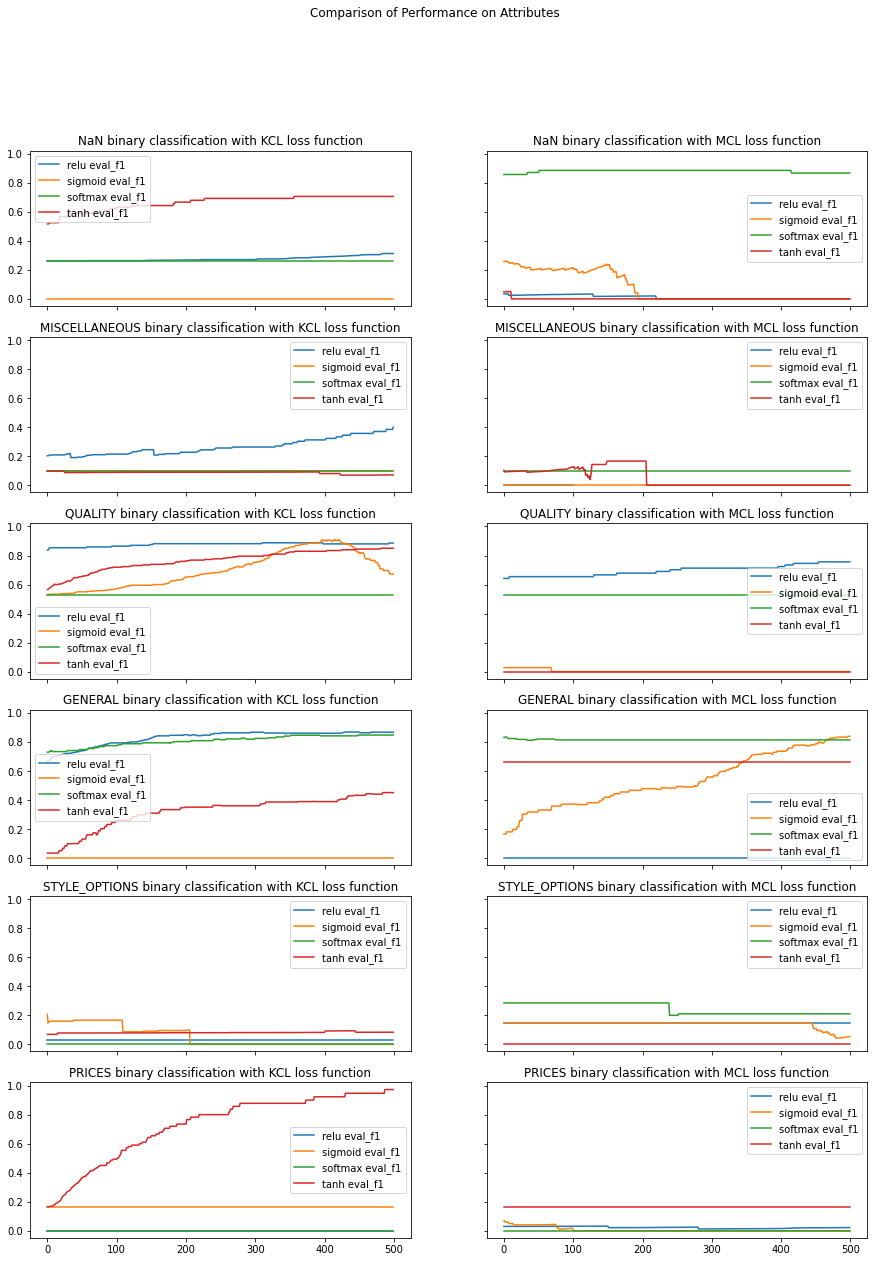

In [16]:
title = '{} binary classification with {} loss function'

fig, axs = plt.subplots(len(attributes), 2, sharex=True, sharey=True,figsize=(15,20))
fig.suptitle('Comparison of Performance on Attributes')

for index, (kcl, mcl, attribute) in enumerate(itertools.zip_longest(att_rows_kcl, att_rows_mcl, attributes)):
    plots.plot_performance(kcl, 'activation', metric='f1', subplot=axs[index,0], title=title.format(attribute, 'KCL'), train=False)
    plots.plot_performance(mcl, 'activation', metric='f1', subplot=axs[index,1], title=title.format(attribute, 'MCL'), train=False)

### Entity Binary

In [17]:
selection = {
    'dataset': 'restaurants',
     'train_entities': True,
     'embedding': 'bert-base-cased',
     'use_kcl': True,
     'binary': True,
     'lr': 0.0001,
     'binary_target_class': 'GENERAL',
     'output_dim':7,
}

In [18]:
entities.remove('NaN')

In [19]:
ent_rows_kcl = []
ent_rows_mcl = []

for ent in entities:
    selection['binary_target_class'] = ent
    selection['use_kcl'] = True
    ent_rows_kcl.append(plots.get_rows(logs, selection))
    selection['use_kcl'] = False
    ent_rows_mcl.append(plots.get_rows(logs, selection))

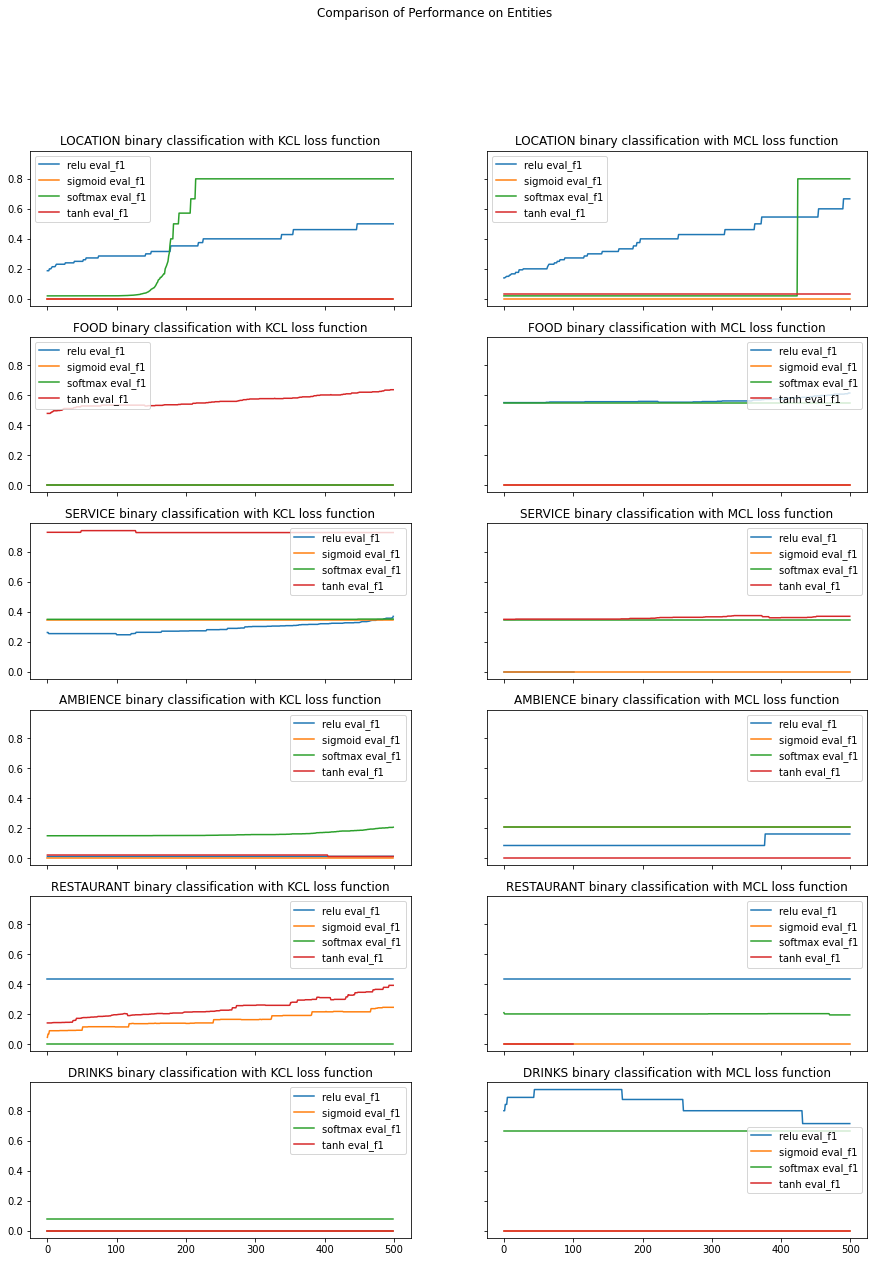

In [20]:
title = '{} binary classification with {} loss function'

fig, axs = plt.subplots(len(entities), 2, sharex=True, sharey=True,figsize=(15,20))
fig.suptitle('Comparison of Performance on Entities')

for index, (kcl, mcl, entity) in enumerate(itertools.zip_longest(ent_rows_kcl, ent_rows_mcl, entities)):
    plots.plot_performance(kcl, 'activation', metric='f1', subplot=axs[index,0], title=title.format(entity, 'KCL'), train=False)
    plots.plot_performance(mcl, 'activation', metric='f1', subplot=axs[index,1], title=title.format(entity, 'MCL'), train=False)